### Pyber Analysis

Pyber is most heavily utilized in urban areas. Urban areas have the highest proportion of total fares (62.7%), total rides (68.4%), and total drivers (80.9%).

Urban areas also see the most consistent average fares; average fares in urban areas range from 20 – 30 dollars. The spread of the data in suburban areas is slightly less consistent—from 25 - 40 dollars per fare. Rural areas have average prices ranging from 20 - 45 dollars per fare, making rural fares the least consistent among the groups. 

Despite their spread, rural areas also have the highest average fares in our data set. Ten rural cities have average fares above 35 dollars, whereas 2 suburban cities and 0 urban cities have similar fares. Though some rural cities have average fares comparable to urban or suburban cities, in general the average fare in rural cities is much higher.


In [56]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Import and read CSVs
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [58]:
# Merge the dataframe
cityride_df = pd.merge(city_df, ride_df, on="city", how = "left")

# Display the data table for preview
cityride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [59]:
#Separate cities by city type
urban_df = cityride_df.loc[cityride_df["type"]== "Urban", :]
suburban_df = cityride_df.loc[cityride_df["type"]=="Suburban", :]
rural_df = cityride_df.loc[cityride_df["type"]=="Rural", :]



In [60]:
#Find total fare, total rides, and total cities
tfare_u = urban_df["fare"].sum()
trides_u = urban_df["ride_id"].nunique()
tfare_s = suburban_df["fare"].sum()
trides_s = suburban_df["ride_id"].nunique()
tfare_r = rural_df["fare"].sum()
trides_r = rural_df["ride_id"].nunique()


In [63]:
#Drop duplicates to calculate total drivers by city type
drivers_u_df = urban_df[["city", "driver_count"]].drop_duplicates()
tdrivers_u = drivers_u_df["driver_count"].sum()

drivers_s_df = suburban_df[["city", "driver_count"]].drop_duplicates()
tdrivers_s = drivers_s_df["driver_count"].sum()

drivers_r_df = rural_df[["city", "driver_count"]].drop_duplicates()
tdrivers_r = drivers_r_df["driver_count"].sum()

In [64]:
#Urban cities: groupby and stats by city

urban_gb = urban_df.groupby("city", as_index=True)
avgfare_u = urban_gb["fare"].mean()
rides_u = urban_gb["city"].value_counts() 
drivers_u = urban_gb["driver_count"].mean()



In [65]:
#Suburban cities: groupby and stats by city
suburban_gb = suburban_df.groupby("city")
avgfare_s = suburban_gb["fare"].mean()
rides_s = suburban_gb["ride_id"].nunique()
drivers_s = suburban_gb["driver_count"].mean()


In [66]:
#Rural cities: groupby and stats
rural_gb = rural_df.groupby("city")
avgfare_r = rural_gb["fare"].mean()
rides_r = rural_gb["ride_id"].nunique() 
drivers_r = rural_gb["driver_count"].mean()



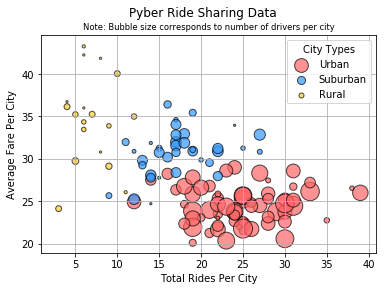

In [67]:
#Formating for all graphs 
colors = ["#FF6666", "#3399FF", "#FFCC33"]

#Bubbleplot
#Plot data
plt.scatter(rides_u, avgfare_u, s=(drivers_u)*5, color = colors[0], alpha = 0.7, edgecolor = "black", label = "Urban")
plt.scatter(rides_s, avgfare_s, s=(drivers_s)*5, color = colors[1], alpha = 0.7, edgecolor = "black", label = "Suburban")
plt.scatter(rides_r, avgfare_r, s= (drivers_r)*5, color = colors[2], alpha = 0.7, edgecolor = "black", label = "Rural")

#Plot titles and legend
plt.suptitle("Pyber Ride Sharing Data", size = "large")
plt.title("Note: Bubble size corresponds to number of drivers per city", size = "small")
plt.xlabel("Total Rides Per City")
plt.ylabel("Average Fare Per City ($)")
plt.legend(title = "City Types", loc = "best")
plt.grid()


plt.show()

Text(0.5, 1.0, 'Total Fares by City Type')

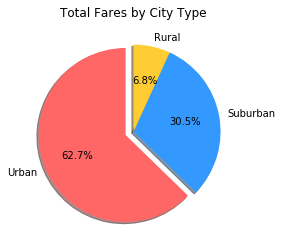

In [78]:
#Pie Plot: Total Fares by City Type
totalfares = [tfare_u, tfare_s, tfare_r]
labels = ["Urban", "Suburban", "Rural"]
explode = [0.1, 0, 0]
plt.pie(totalfares, labels = labels, colors = colors, shadow = True, autopct = "%1.1f%%", explode = explode, startangle = 90)
axes = "equal"
plt.title("Total Fares by City Type")

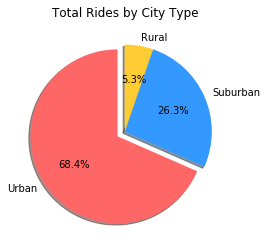

In [79]:
#Pie Plot: Total Rides by City Type
totalrides = [trides_u, trides_s, trides_r]
labels = ["Urban", "Suburban", "Rural"]
explode = [0.1, 0, 0]
plt.pie(totalrides, labels = labels, colors = colors, shadow = True, autopct = "%1.1f%%", explode = explode, startangle = 90)
plt.title("Total Rides by City Type")
axes = "equal"


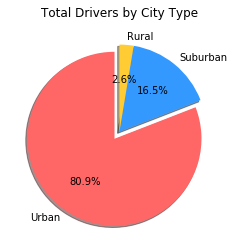

In [80]:
#Pie Plot: Total Drivers by City Type
totaldrivers = [tdrivers_u, tdrivers_s, tdrivers_r]
labels = ["Urban", "Suburban", "Rural"]
explode = [0.1, 0, 0]
plt.pie(totaldrivers, labels = labels, colors = colors, shadow = True, autopct = "%1.1f%%", explode = explode, startangle = 90)
plt.title("Total Drivers by City Type")
axes = "equal"